In [8]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
from twitterscraper import query_tweets
from twitterscraper.query import query_tweets_from_user
import datetime as dt 
import pandas as pd 


begin_date = dt.date(2019,12,10)
end_date = dt.date(2019,12,13)


limit = 100
lang = 'english'

#Use this to search a specific user

user = 'realDonaldTrump'
tweets = query_tweets_from_user(user)
df = pd.DataFrame(t.__dict__ for t in tweets)

df = df.loc[df['screen_name'] == user]

df = df['text']

df

#Use this if wanting to seach for a specific Phrase or word

#tweets = query_tweets('impeachment', begindate = begin_date, enddate = end_date, limit = limit, lang = lang)
#df = pd.DataFrame(t.__dict__ for t in tweets)

#df = df['text']

#df

INFO: Scraping tweets from https://twitter.com/realDonaldTrump
INFO: Using proxy 74.113.169.129:47208
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1206946946289668099&reset_error_state=false
INFO: Using proxy 103.36.126.14:43999
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1206586814607351813&reset_error_state=false
INFO: Using proxy 118.69.219.185:55184
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1206581028283965441&reset_error_state=false
INFO: Using proxy 185.108.141.74:8080
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1206326302661398536&reset_e

INFO: Using proxy 92.84.56.10:51275
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1200898671862259718&reset_error_state=false
INFO: Using proxy 122.15.131.65:57873
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1199527777470423051&reset_error_state=false
INFO: Using proxy 45.71.108.18:46114
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1199190013554155521&reset_error_state=false
INFO: Using proxy 5.9.202.165:1080
INFO: Scraping tweets from https://twitter.com/i/profiles/show/realDonaldTrump/timeline/tweets?include_available_features=1&include_entities=1&max_position=1198746376420679680&reset_error_state=false
INFO: Using proxy 203.153.107.166:53557
INFO: Scraping

0      .@marcthiessen  “Voters say the Democrats are ...
1      So, if Comey & the top people in the FBI were ...
2      Good marks and reviews on the letter I sent to...
3      Democrat “leadership,” despite their denials, ...
4      Wow! “In a stunning rebuke of the FBI, the FIS...
5                             pic.twitter.com/WzLB5s41m3
6      Senator Dan Sullivan is doing a great job for ...
7      .@Buddy_Carter is a BUSINESSMAN first. He take...
8      Congressman @Denver4VA Riggleman is a true CON...
9      Congressman @MarkwayneMullin is a big time #MA...
10     Congresswoman Kay @GrangerCampaign has worked ...
11     We support @JeanineAnez in Bolivia as she work...
12     Senator Josh Hawley (R-Mo) “They (the Dems) do...
13     Would be sooo great if the Fed would further l...
14     The new USA Today Poll, just out, has me leadi...
15     Impeachment Poll numbers are starting to drop ...
16     .@FoxNews  “Trump wins major victories in Chin...
17     The Stock Market hit ano

In [6]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines[:100])

['.@marcthiessen', '“Voters', 'say', 'the', 'Democrats', 'are', 'trying', 'to', 'take', 'away', 'their', 'votes.', 'Pelosi', 'was', 'right', 'the', 'first', 'time.', 'Impeachment', 'has', 'backfired', 'thoroughly', 'on', 'the', 'Democrats.', 'How', 'can', 'you', 'Impeach', 'the', 'President', 'for', 'going', 'to', 'the', 'courts?”', 'So,', 'if', 'Comey', '&', 'the', 'top', 'people', 'in', 'the', 'FBI', 'were', 'dirty', 'cops', 'and', 'cheated', 'on', 'the', 'FISA', 'Court,', 'wouldn’t', 'all', 'of', 'these', 'phony', 'cases', 'have', 'to', 'be', 'overturned', 'or', 'dismissed?', 'They', 'went', 'after', 'me', 'with', 'the', 'Fake', 'Dossier,', 'paid', 'for', 'by', 'Crooked', 'Hillary', '&', 'the', 'DNC,', 'which', 'they', 'illegally', 'presented', 'to', 'FISA...', 'Good', 'marks', 'and', 'reviews', 'on', 'the', 'letter', 'I', 'sent', 'to', 'Pelosi']


In [9]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [10]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem[:50]

['marcthiessen',
 'voter',
 'say',
 'the',
 'democrat',
 'are',
 'tri',
 'to',
 'take',
 'away',
 'their',
 'vote',
 'pelosi',
 'was',
 'right',
 'the',
 'first',
 'time',
 'impeach',
 'has',
 'backfir',
 'thorough',
 'on',
 'the',
 'democrat',
 'how',
 'can',
 'you',
 'impeach',
 'the',
 'presid',
 'for',
 'go',
 'to',
 'the',
 'court',
 'so',
 'if',
 'comey',
 'the',
 'top',
 'peopl',
 'in',
 'the',
 'fbi',
 'were',
 'dirti',
 'cop',
 'and',
 'cheat']

In [25]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2[:50]

['marcthiessen',
 'voter',
 'democrat',
 'tri',
 'away',
 'vote',
 'pelosi',
 'right',
 'time',
 'impeach',
 'backfir',
 'thorough',
 'democrat',
 'impeach',
 'presid',
 'court',
 'comey',
 'peopl',
 'fbi',
 'dirti',
 'cop',
 'cheat',
 'fisa',
 'court',
 'wouldnt',
 'phoni',
 'case',
 'overturn',
 'dismiss',
 'went',
 'fake',
 'dossier',
 'paid',
 'crook',
 'hillari',
 'dnc',
 'illeg',
 'present',
 'fisa',
 'good',
 'mark',
 'review',
 'letter',
 'sent',
 'pelosi',
 'today',
 'worst',
 'wonder',
 'peopl',
 'like']

In [18]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [ ]:
#This will give frequencies of our words
#We don't actually end up using this section
from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

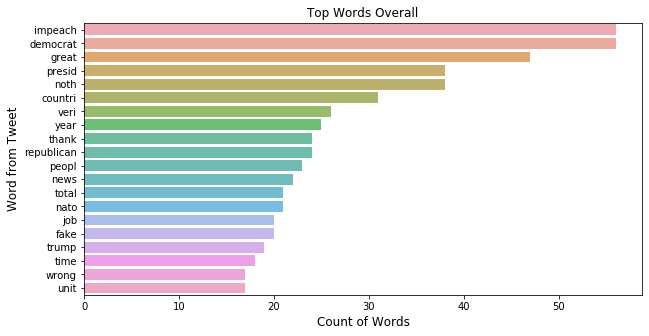

In [19]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()



In [20]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()



In [21]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [22]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()


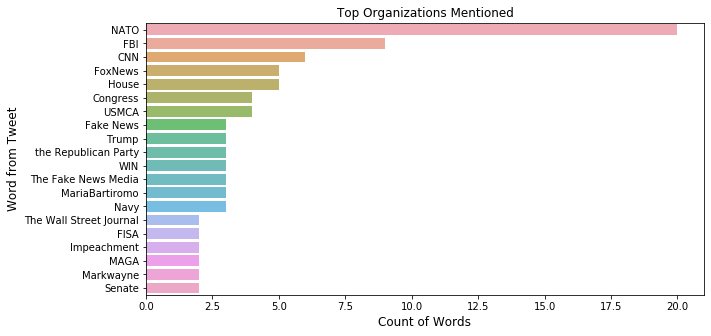

In [23]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [24]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()


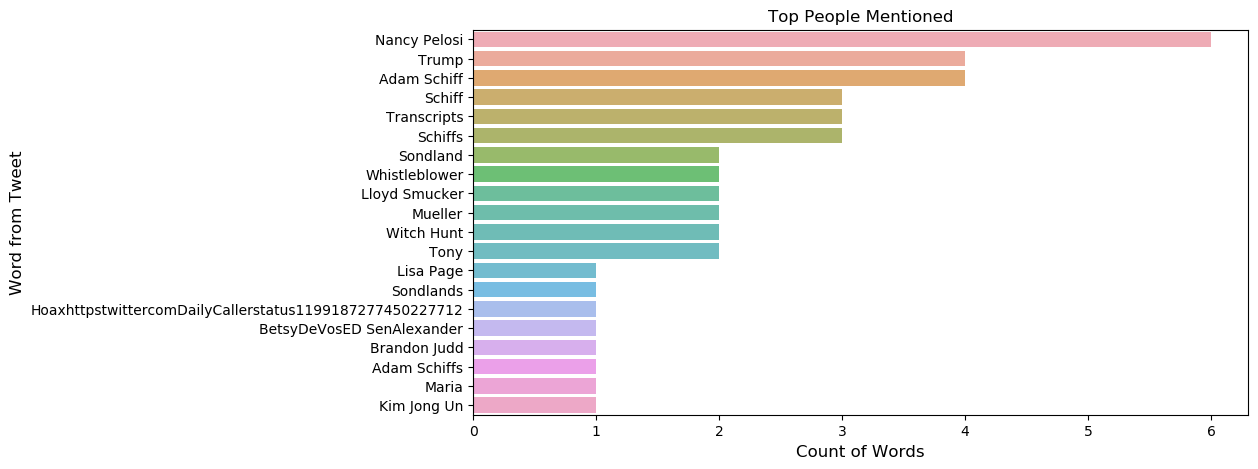

In [216]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()